In [6]:
import pandas as pd
from google_play_scraper import app
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Daftar ID aplikasi Keuangan yang Digunakan
app_ids = [
    'com.gojek.gopay',        # GoPay
    'ovo.id',                 # OVO
    'id.dana',                # DANA
    'com.shopeepay.id',       # Shopeepay
    'ph.seabank.seabank',     # Seabank
    'com.jago.digitalBanking',# Jago
    'com.finaccel.android'    # Kredivo
]

# Mengambil data untuk setiap aplikasi
app_details = []
print("Memulai proses scraping...")

for app_id in app_ids:
    try:
        details = app(app_id, lang='id', country='id')
        app_details.append(details)
        print(f"Berhasil mengambil data untuk: {details['title']}")
    except Exception as e:
        print(f"Gagal mengambil data untuk {app_id}: {e}")

# Membuat DataFrame
df = pd.DataFrame(app_details)

# Pembersihan dan Persiapan Data
columns_to_keep = ['title', 'installs', 'score', 'ratings', 'reviews', 'developer', 'genre']
df_clean = df[columns_to_keep].copy()
df_clean['installs_numeric'] = df_clean['installs'].str.replace(r'[^0-9]', '', regex=True).astype(int)
df_clean['title'] = df_clean['title'].replace({'Gojek':'Gojek (GoPay)'})

# Menyimpan data ke CSV
csv_filename = 'google_play_fintech_apps.csv'
df_clean.to_csv(csv_filename, index=False, encoding='utf-8')
print(f"\nData berhasil disimpan ke file: {csv_filename}")

Memulai proses scraping...
Berhasil mengambil data untuk: GoPay: Transfer Pulsa Tagihan
Berhasil mengambil data untuk: OVO
Berhasil mengambil data untuk: DANA Dompet Digital Indonesia
Berhasil mengambil data untuk: ShopeePay – Dompet Serba Bisa
Berhasil mengambil data untuk: SeaBank PH - Fast&Easy Banking
Berhasil mengambil data untuk: Bank Jago/Jago Syariah
Berhasil mengambil data untuk: Kredivo - Paylater & Pinjaman

Data berhasil disimpan ke file: google_play_fintech_apps.csv


Visualisasi Studi Kasus 1 disimpan sebagai market_landscape.png


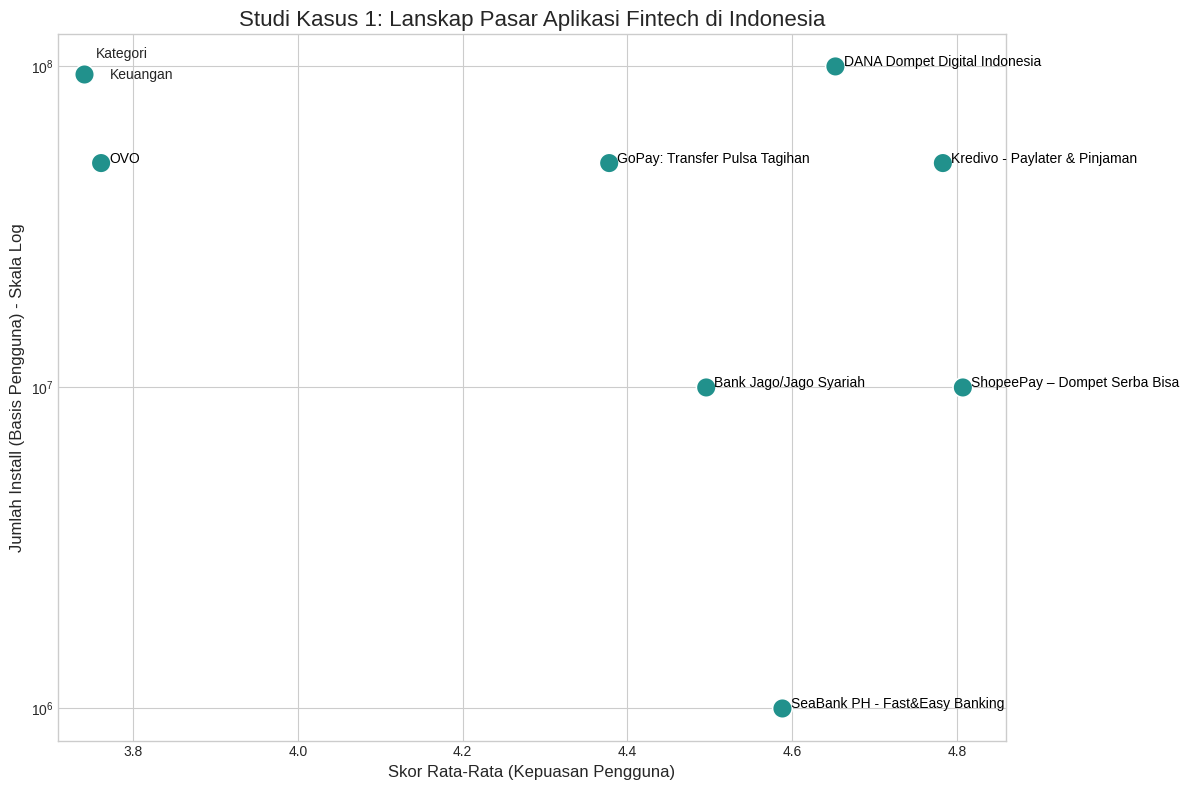

In [7]:
# --- Studi Kasus 1: Analisis Lanskap Pasar ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df_clean, x='score', y='installs_numeric', s=200, hue='genre', palette='viridis', ax=ax)
for i in range(df_clean.shape[0]):
    plt.text(x=df_clean.score[i]+0.01, y=df_clean.installs_numeric[i], s=df_clean.title[i],
             fontdict=dict(color='black', size=10))
ax.set_yscale('log')
ax.set_title('Studi Kasus 1: Lanskap Pasar Aplikasi Fintech di Indonesia', fontsize=16)
ax.set_xlabel('Skor Rata-Rata (Kepuasan Pengguna)', fontsize=12)
ax.set_ylabel('Jumlah Install (Basis Pengguna) - Skala Log', fontsize=12)
ax.legend(title='Kategori')
plt.tight_layout()
plt.savefig('market_landscape.png')
print("Visualisasi Studi Kasus 1 disimpan sebagai market_landscape.png")

In [ ]:
# --- Studi Kasus 2: Analisis Keterlibatan Pengguna ---
df_clean['review_ratio'] = df_clean['reviews'] / df_clean['ratings']
df_sorted_by_ratio = df_clean.sort_values('review_ratio', ascending=False)
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=df_sorted_by_ratio, x='review_ratio', y='title', palette='plasma', ax=ax)
ax.set_title('Studi Kasus 2: Keterlibatan Pengguna (Review per Rating)', fontsize=16)
ax.set_xlabel('Rasio Review per Rating', fontsize=12)
ax.set_ylabel('Aplikasi', fontsize=12)
plt.tight_layout()
plt.savefig('user_engagement.png')
print("Visualisasi Studi Kasus 2 disimpan sebagai user_engagement.png")